In [1]:
i_pack <- function(pack) {
   suppressWarnings(suppressMessages( install.packages(pack) )) 
}
i_pack("openxlsx")  
i_pack("openxlsx")  
i_pack("data.table")
i_pack("zoo")
i_pack("dplyr")
i_pack("lubridate")
i_pack("forecast")
i_pack("ggplot2")
i_pack("ggcorrplot")
i_pack("corrplot")
i_pack("GGally")
i_pack("gridExtra")
i_pack("ggfortify")
i_pack("urca")




package 'openxlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Raven\AppData\Local\Temp\RtmpGqkchi\downloaded_packages
package 'openxlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Raven\AppData\Local\Temp\RtmpGqkchi\downloaded_packages
package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Raven\AppData\Local\Temp\RtmpGqkchi\downloaded_packages
package 'zoo' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Raven\AppData\Local\Temp\RtmpGqkchi\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Raven\AppData\Local\Temp\RtmpGqkchi\downloaded_packages
package 'lubridate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Raven\AppData\Local\Temp\RtmpGqkchi\downloaded_packages
pac

In [2]:

library(openxlsx,quietly = TRUE)
library(data.table,quietly = TRUE)
library(zoo,quietly = TRUE)
library(dplyr,quietly = TRUE)
library(lubridate,quietly = TRUE)
library(forecast,quietly = TRUE)
library(ggplot2,quietly = TRUE)
library(ggcorrplot,quietly = TRUE)
library(corrplot,quietly = TRUE)
library(GGally,quietly = TRUE)
library(gridExtra,quietly = TRUE)
library(ggfortify,quietly = TRUE)
library(urca)


Warning message:
"package 'openxlsx' was built under R version 3.6.3"Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from 'package:base':

    date, intersect, setdiff,

In [3]:
#Reads data. Read first 35726 rows
df <- read.xlsx("data_hw4.xlsx", sheet = 1,
  startRow = 1,
  colNames = TRUE,
  rowNames = FALSE,
  detectDates = TRUE,
  skipEmptyRows = TRUE,
  skipEmptyCols = TRUE,
  rows = c(1:35726),
  cols = NULL,
  check.names = FALSE,
  sep.names = ".",
)

#Adds data.table class to data frame and checks
DT <- data.table(df)

#Sets column names 
setnames(DT, c("Date","Hour","Consumption" ) )

str(DT)
head(DT)

#Formats date as date format. 
DT[, Date := as.Date(Date,format = "%d.%m.%Y"), ]
# This versions returns NA for some reason DT <- DT[, Consumption := as.numeric(Consumption),]

#https://stackoverflow.com/questions/21027806/replacing-commas-and-dots-in-r
DT <- DT[, Consumption := as.numeric((gsub(",", ".", gsub("\\.", "", Consumption)))),]


str(DT)
head(DT)


Classes 'data.table' and 'data.frame':	35725 obs. of  3 variables:
 $ Date       : chr  "01.01.2017" "01.01.2017" "01.01.2017" "01.01.2017" ...
 $ Hour       : chr  "00:00" "01:00" "02:00" "03:00" ...
 $ Consumption: chr  "27.223,06" "25.825,90" "24.252,68" "22.915,47" ...
 - attr(*, ".internal.selfref")=<externalptr> 


Date,Hour,Consumption
01.01.2017,00:00,"27.223,06"
01.01.2017,01:00,"25.825,90"
01.01.2017,02:00,"24.252,68"
01.01.2017,03:00,"22.915,47"
01.01.2017,04:00,"22.356,99"
01.01.2017,05:00,"22.274,49"


Classes 'data.table' and 'data.frame':	35725 obs. of  3 variables:
 $ Date       : Date, format: "2017-01-01" "2017-01-01" ...
 $ Hour       : chr  "00:00" "01:00" "02:00" "03:00" ...
 $ Consumption: num  27223 25826 24253 22915 22357 ...
 - attr(*, ".internal.selfref")=<externalptr> 


Date,Hour,Consumption
2017-01-01,00:00,27223.06
2017-01-01,01:00,25825.90
2017-01-01,02:00,24252.68
2017-01-01,03:00,22915.47
2017-01-01,04:00,22356.99
2017-01-01,05:00,22274.49


In [4]:
#Daily Mean DT
DDT <- DT[,.(Consumption = mean(Consumption)),by=.(Date)] 

DailyM_DT <-copy(DDT)
DailyM_DT <- DailyM_DT[Date <= as.Date('2021-01-08')]

Forecast_DT <-copy(DDT)
Forecast_DT <- Forecast_DT[Date >= as.Date('2021-01-09')]
Forecast_DT <- Forecast_DT[Date <= as.Date('2021-01-23')]

tail(DailyM_DT)
head(Forecast_DT,20)



Date,Consumption
2021-01-03,30023.36
2021-01-04,35548.28
2021-01-05,36723.26
2021-01-06,37182.32
2021-01-07,37299.57
2021-01-08,36873.90


Date,Consumption
2021-01-09,34781.56
2021-01-10,31841.90
2021-01-11,36431.46
2021-01-12,36897.99
2021-01-13,37409.87
2021-01-14,38056.05
2021-01-15,38170.38
2021-01-16,35667.35
2021-01-17,32557.96
2021-01-18,38447.89


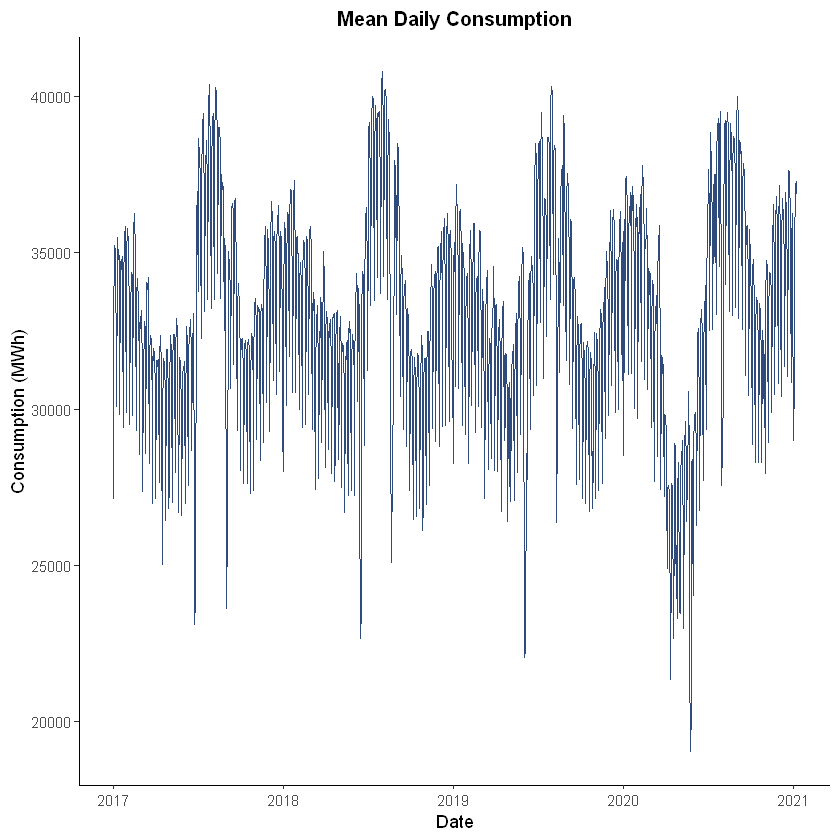

In [5]:
 p1 <- ggplot( data= DailyM_DT, aes(x=Date, y=Consumption) ) +
  theme_classic()+
  theme(plot.title = element_text(size = 12, face = "bold",hjust = 0.5))+
  labs( x="Date",y="Consumption (MWh)",title=("Mean Daily Consumption"))+
  geom_line(color="#2f4b7c")

p1

In this study autoregressive (AR) and moving average (MA) models will be used. In order to use those models the data should be stationary as possible. Stationary series are flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations called seasonality. According to my visual analysis there is a obivious seasonality correlated with actual season (e.g consumpuion increases in summer), thre are many outliers, data does not have a signifiant linear trend although mean is changing. Also Spring 2020 quarter is not follow the pattern due to COVID-19 restrictions, consumption is much lower since industrial production halted with lockdowns. The variance does not change over time so Time series decomposition can be made as additive. To understand and achieve the stationary better autocorrelation analysis, KPSS Unit Root Test, decomposition analysis can be conducted.
## Stationary.

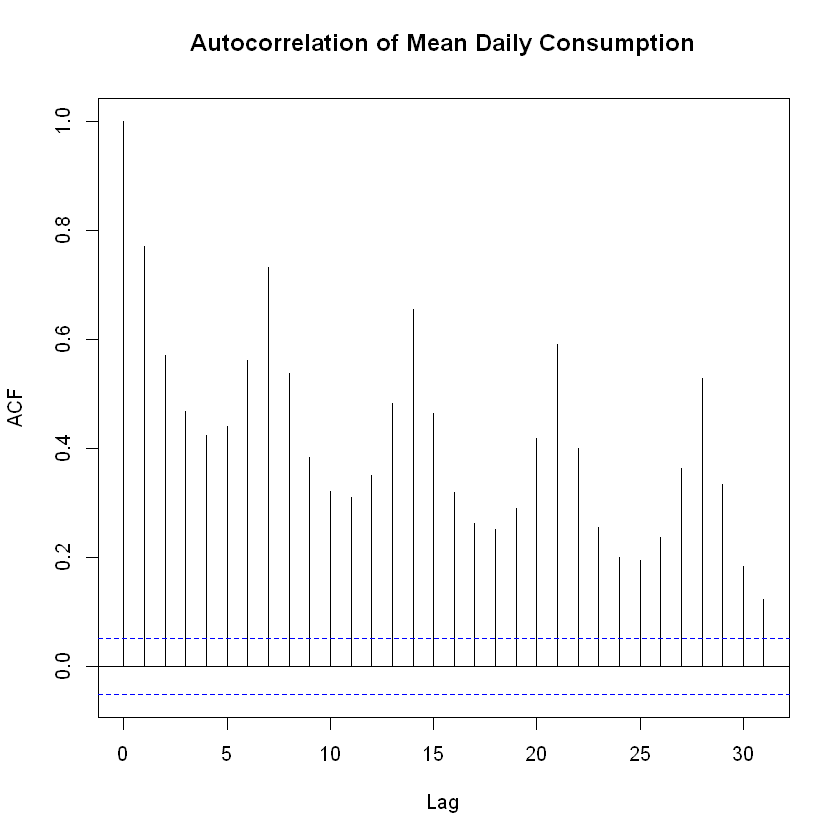

In [6]:
acf(DailyM_DT$Consumption, main= "Autocorrelation of Mean Daily Consumption")

The noticable positive autocorrelation among lag 1 probably resulted by trend and lag 7 probably resulted by weekly seasonality is spotted on ACF results. Some autocorrelation may be result of the propagation of the previous autocorrelations. PAFC may give a clearer perspective.

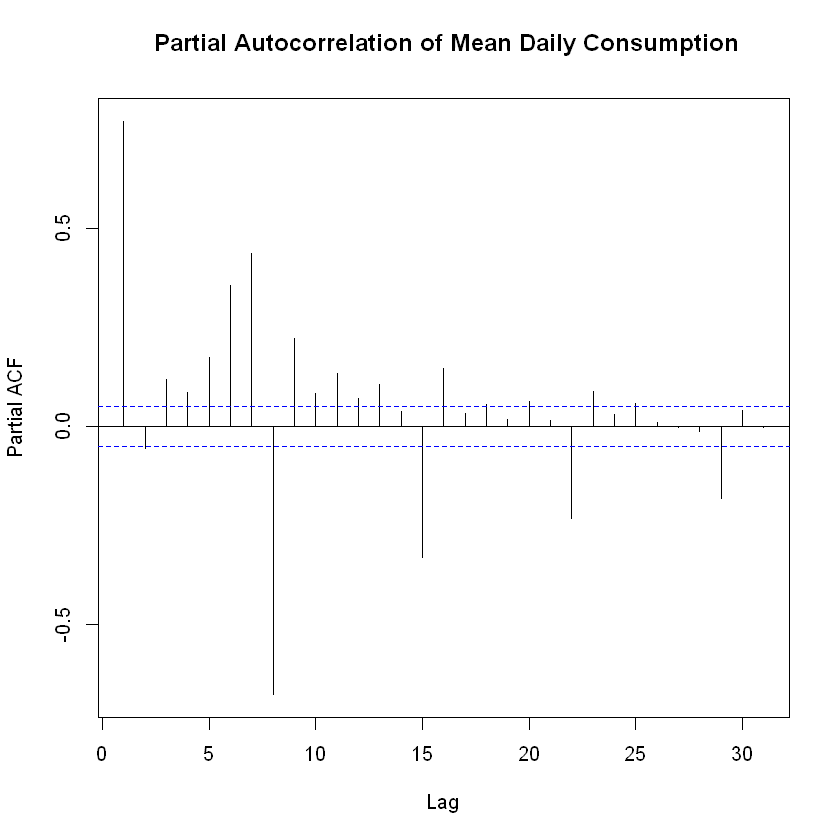

In [7]:
pacf(DailyM_DT$Consumption,main= " Partial Autocorrelation of Mean Daily Consumption")


PACF supports the previous claims, every 7 days follows a similar pattern, there is a weekly seasonality. 

In [8]:
summary(ur.kpss(DailyM_DT$Consumption))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.1457 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


 Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test are used for testing a null hypothesis that an observable time series is stationary around the trend. The null hypothesis is not rejected for the series yet value still close to the critical values. More stationary series may be achievable by removing weekly seasonality.
 
  
 In order to achieve that, three new columns are created for means values for day, month, year respectively. Then for every consumption value day and month effect on consumption will be replaced by that year's average.
 

In [9]:
head(DailyM_DT)
DailyM_DT <- DailyM_DT[, day := as.factor(weekdays(Date))]
DailyM_DT <- DailyM_DT[, day_adjustment := mean(Consumption),by=day]

DailyM_DT <- DailyM_DT[, month := as.factor(month(Date))]
DailyM_DT <- DailyM_DT[, month_adjustment := mean(Consumption),by=month]

DailyM_DT <- DailyM_DT[, year := as.factor(year(Date))]
DailyM_DT <- DailyM_DT[, year_adjustment := mean(Consumption),by=year]

DailyM_DT <- DailyM_DT[, Adjusted_Consumption := Consumption- day_adjustment - month_adjustment + year_adjustment*2 ]


head(DailyM_DT,15)


Date,Consumption
2017-01-01,27099.66
2017-01-02,33141.88
2017-01-03,34769.59
2017-01-04,35250.70
2017-01-05,35109.35
2017-01-06,33866.49


Date,Consumption,day,day_adjustment,month,month_adjustment,year,year_adjustment,Adjusted_Consumption
2017-01-01,27099.66,Pazar,29217.90,1,34445.92,2017,33102.19,29640.22
2017-01-02,33141.88,Pazartesi,33267.64,1,34445.92,2017,33102.19,31632.70
2017-01-03,34769.59,Salı,34173.19,1,34445.92,2017,33102.19,32354.86
2017-01-04,35250.70,Çarşamba,34418.98,1,34445.92,2017,33102.19,32590.19
2017-01-05,35109.35,Perşembe,34517.76,1,34445.92,2017,33102.19,32350.06
2017-01-06,33866.49,Cuma,34180.70,1,34445.92,2017,33102.19,31444.25
2017-01-07,32339.15,Cumartesi,32536.25,1,34445.92,2017,33102.19,31561.36
2017-01-08,30098.06,Pazar,29217.90,1,34445.92,2017,33102.19,32638.62
2017-01-09,34605.60,Pazartesi,33267.64,1,34445.92,2017,33102.19,33096.42
2017-01-10,35508.33,Salı,34173.19,1,34445.92,2017,33102.19,33093.60


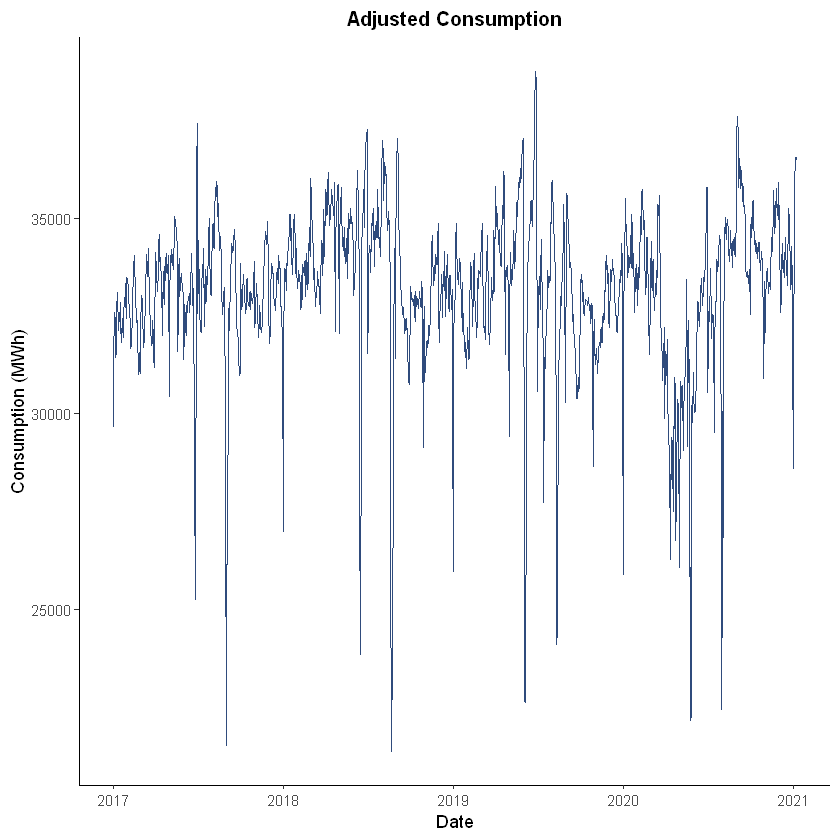

In [10]:
 p1 <- ggplot( data= DailyM_DT, aes(x=Date, y=Adjusted_Consumption) ) +
  theme_classic()+
  theme(plot.title = element_text(size = 12, face = "bold",hjust = 0.5))+
  labs( x="Date",y="Consumption (MWh)",title=("Adjusted Consumption"))+
  geom_line(color="#2f4b7c")

p1

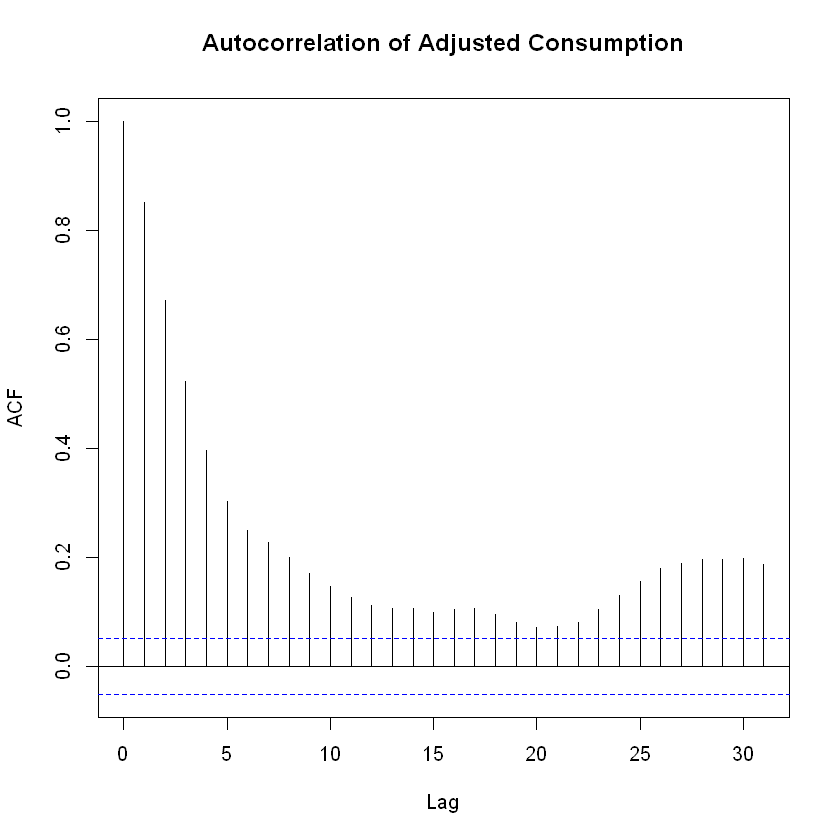

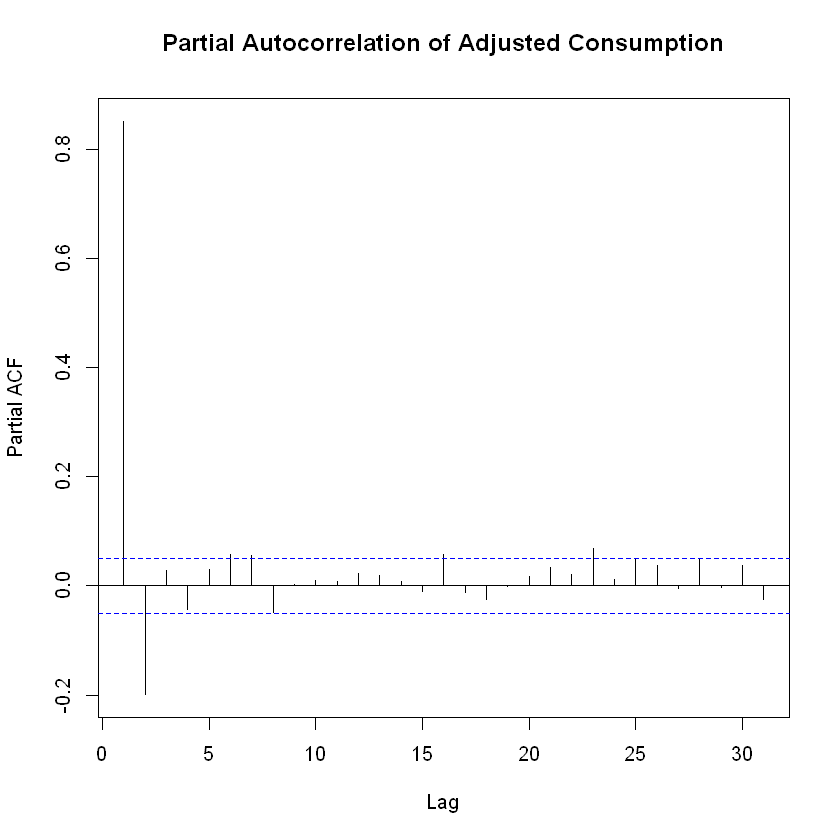

In [11]:
acf(DailyM_DT$Adjusted_Consumption, main= "Autocorrelation of Adjusted Consumption")
pacf(DailyM_DT$Adjusted_Consumption, main= "Partial Autocorrelation of Adjusted Consumption")


The adjustments based on the day, month, year has removed the seasonality effect on the lag 7. 

In [12]:
DailyM_DT <- DailyM_DT[,lag1:=shift(Adjusted_Consumption,1)]
DailyM_DT <- DailyM_DT[, Adjusted_Consumption_WithLag1 := Adjusted_Consumption - lag1 ]

Warning message:
"Removed 1 row(s) containing missing values (geom_path)."

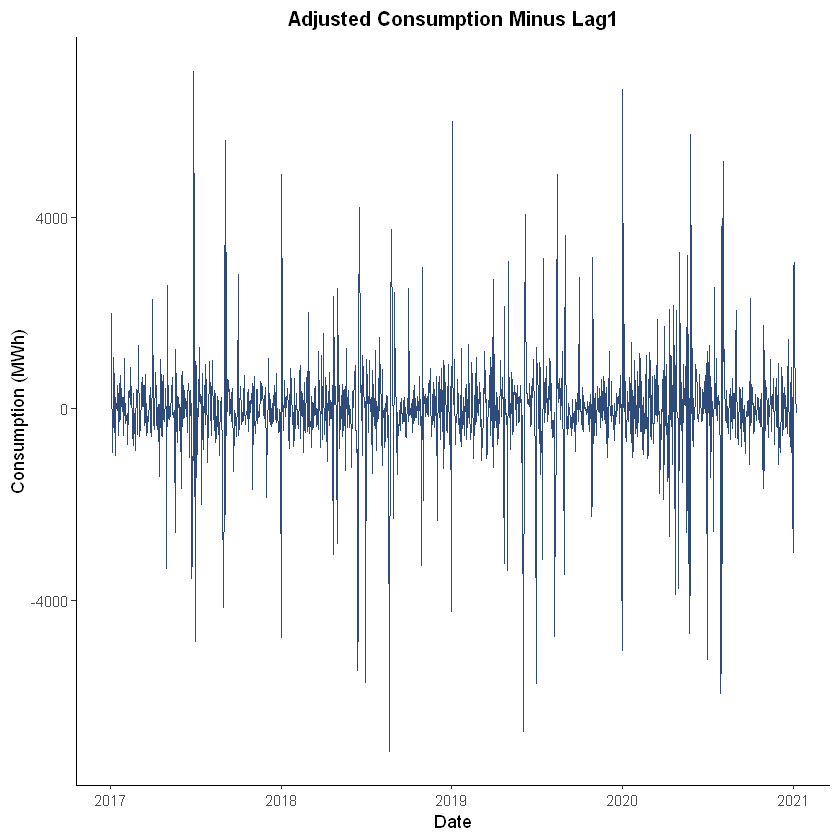

In [13]:
 p1 <- ggplot( data= DailyM_DT, aes(x=Date, y=Adjusted_Consumption_WithLag1) ) +
  theme_classic()+
  theme(plot.title = element_text(size = 12, face = "bold",hjust = 0.5))+
  labs( x="Date",y="Consumption (MWh)",title=("Adjusted Consumption Minus Lag1"))+
  geom_line(color="#2f4b7c")

p1

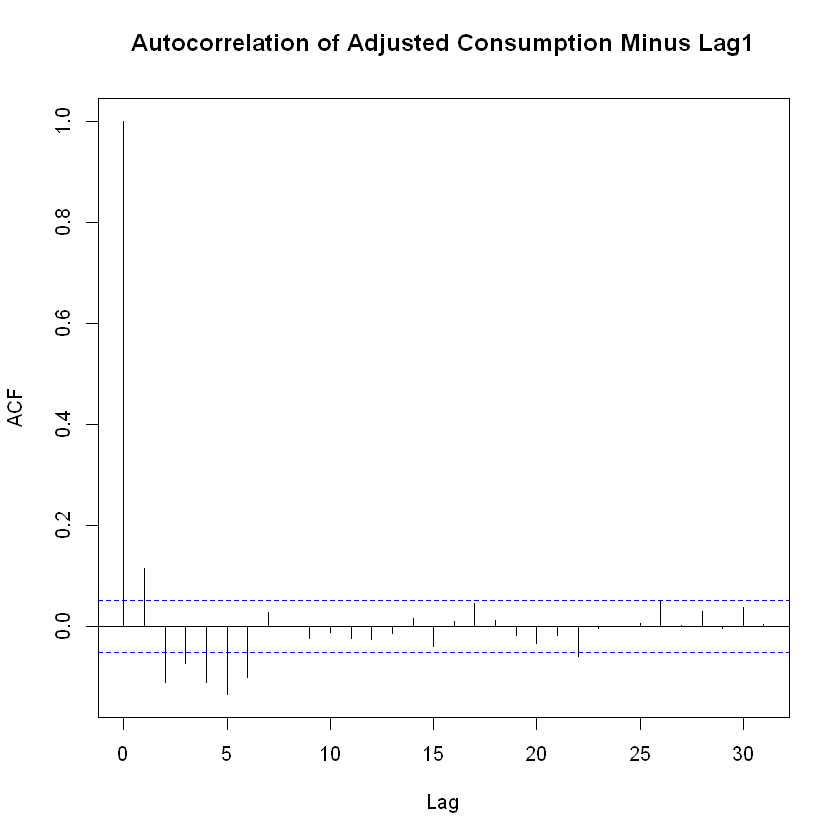

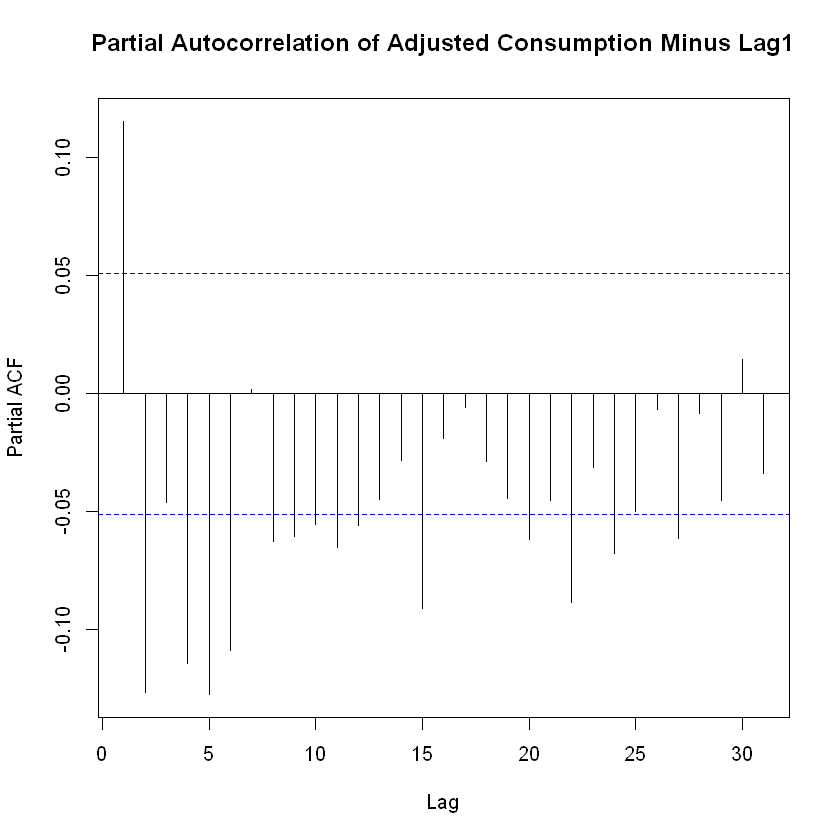

In [14]:
acf(DailyM_DT$Adjusted_Consumption_WithLag1[-1], main= "Autocorrelation of Adjusted Consumption Minus Lag1")
pacf(DailyM_DT$Adjusted_Consumption_WithLag1[-1], main= "Partial Autocorrelation of Adjusted Consumption Minus Lag1")

In [15]:
summary(ur.kpss(DailyM_DT$Adjusted_Consumption_WithLag1))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.0067 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


[1] "Acual Consumption"
[1] "Adjusted Consumption With Lag1"


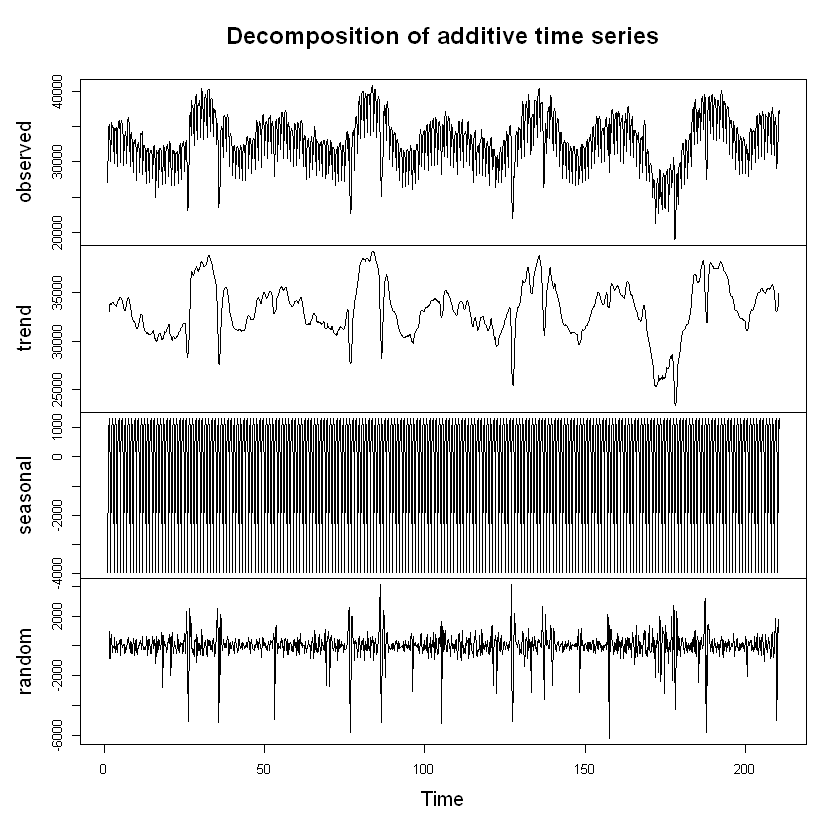

[1] "Adjusted Consumption With Lag1 Outliers Removed"


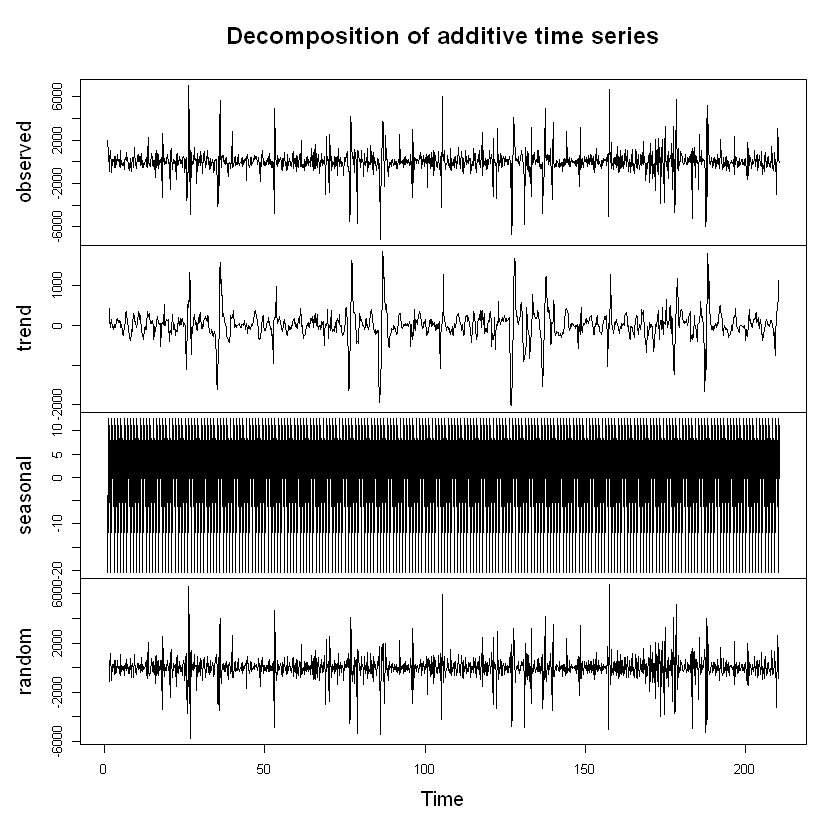

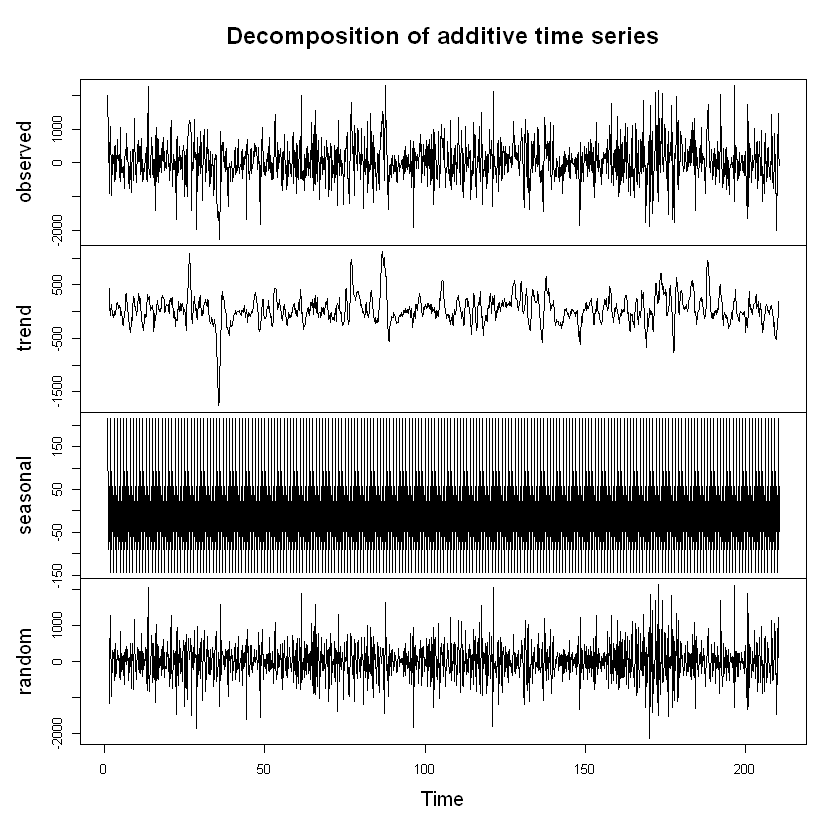

In [16]:
#Convert data into Time-Series Object
TS1<-ts(DailyM_DT$Consumption,frequency=7)
DTS1 <- decompose(TS1,type="additive")
print("Acual Consumption")
plot(DTS1)

TS2 <-ts(DailyM_DT$Adjusted_Consumption_WithLag1[-1],frequency=7)
DTS2 <- decompose(TS2,type="additive")
print("Adjusted Consumption With Lag1")
plot(DTS2)

TS3 <-ts(DailyM_DT$Adjusted_Consumption_WithLag1[-1],frequency=7)
TS3 <- tsclean(TS3)
DTS3 <- decompose(TS3,type="additive")
print("Adjusted Consumption With Lag1 Outliers Removed")
plot(DTS3)


etsydtuykulışoı

## Forecasting
### Model 1


In [17]:
model1 <- auto.arima(DailyM_DT$Adjusted_Consumption_WithLag1[-1],seasonal=F,trace=T)
print("AIC:")
AIC(model1)
print("BIC:")
BIC(model1)


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : 24579.9
 ARIMA(0,0,0) with non-zero mean : 24747.38
 ARIMA(1,0,0) with non-zero mean : 24727.38
 ARIMA(0,0,1) with non-zero mean : 24723.95
 ARIMA(0,0,0) with zero mean     : 24745.4
 ARIMA(1,0,2) with non-zero mean : 24593.33
 ARIMA(2,0,1) with non-zero mean : 24577.92
 ARIMA(1,0,1) with non-zero mean : 24715.92
 ARIMA(2,0,0) with non-zero mean : 24706.4
 ARIMA(3,0,1) with non-zero mean : 24580.57
 ARIMA(3,0,0) with non-zero mean : 24706.13
 ARIMA(3,0,2) with non-zero mean : 24579.39
 ARIMA(2,0,1) with zero mean     : 24576.06
 ARIMA(1,0,1) with zero mean     : 24713.84
 ARIMA(2,0,0) with zero mean     : 24704.4
 ARIMA(3,0,1) with zero mean     : 24578.72
 ARIMA(2,0,2) with zero mean     : 24578.01
 ARIMA(1,0,0) with zero mean     : 24725.38
 ARIMA(1,0,2) with zero mean     : 24591.32
 ARIMA(3,0,0) with zero mean     : 24704.13
 ARIMA(3,0,2) with zero mean     : 24577.52

 Now re-fitting th

[1] 24579.75

[1] "BIC:"


[1] 24600.92

In [18]:
forecasted <- forecast(model1, h = 15)
forecasted

     Point Forecast     Lo 80     Hi 80     Lo 95    Hi 95
1469    -485.911110 -1823.720  851.8974 -2531.913 1560.091
1470    -472.099520 -1810.574  866.3752 -2519.120 1574.921
1471    -371.428938 -1732.913  990.0547 -2453.638 1710.781
1472    -272.627461 -1658.958 1113.7030 -2392.837 1847.582
1473    -194.671529 -1596.798 1207.4551 -2339.039 1949.696
1474    -137.390337 -1548.085 1273.3039 -2294.861 2020.080
1475     -96.469922 -1511.540 1318.6005 -2260.633 2067.694
1476     -67.584531 -1484.836 1349.6666 -2235.083 2099.914
1477     -47.300644 -1465.627 1371.0258 -2216.444 2121.842
1478     -33.089696 -1451.944 1385.7644 -2203.040 2136.860
1479     -23.143657 -1442.256 1395.9689 -2193.489 2147.202
1480     -16.185742 -1435.425 1403.0533 -2186.725 2154.353
1481     -11.319207 -1430.620 1407.9817 -2181.953 2159.314
1482      -7.915744 -1427.247 1411.4155 -2178.596 2162.764
1483      -5.535591 -1424.882 1413.8104 -2176.238 2165.167

In [39]:
prediction <- rep(0, 15)

prediction[1] <- forecasted$mean[1] + DailyM_DT$Adjusted_Consumption_WithLag1[nrow(DailyM_DT)]
for (i in 2:15){
  prediction[i] <- prediction[i-1]+forecasted$mean[i]
}

prediction <- prediction - 2*DailyM_DT$year_adjustment[1469]
prediction <- prediction + DailyM_DT$day_adjustment[7:21]
prediction <- prediction + DailyM_DT$month_adjustment[1]
prediction <- prediction + DailyM_DT$lag1[7:21]
last_trend_value <-tail(DTS2$trend[!is.na(DTS2$trend)],1)
lt <- rep(last_trend_value*2, 15)
prediction <- prediction + lt

date <- as.Date('2021-01-09')
for(k in 2:14){
  date[k] <- date[k-1]+1
}

print(prediction)
class(prediction)


Forecast_DT[,Model1_Prediction:=prediction,]
Forecast_DT

 [1] 31870.26 28196.93 32952.49 34043.21 34091.51 33089.02 32891.41 31192.19
 [9] 27826.67 31832.70 33198.26 32873.81 32482.63 32243.07 31120.21


[1] "numeric"

Date,Consumption,Model1_Prediction,Model2_Prediction,Abs_Error,Perc_Error
2021-01-09,34781.56,31870.26,33762.62,1018.9438,2.9295517
2021-01-10,31841.90,28196.93,30561.03,1280.8725,4.0226007
2021-01-11,36431.46,32952.49,35687.66,743.8004,2.0416429
2021-01-12,36897.99,34043.21,37050.66,152.6655,0.4137502
2021-01-13,37409.87,34091.51,37293.27,116.6023,0.3116887
2021-01-14,38056.05,33089.02,36427.82,1628.2353,4.2785187
2021-01-15,38170.38,32891.41,36326.31,1844.0688,4.8311509
2021-01-16,35667.35,31192.19,34694.32,973.0213,2.7280451
2021-01-17,32557.96,27826.67,31375.75,1182.2112,3.6310976
2021-01-18,38447.89,31832.70,35414.51,3033.3795,7.8895869


Model 2

In [28]:
model2 <- auto.arima(DTS3$random,seasonal=F,trace=T)
AIC(model2)
BIC(model2)


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2)           with non-zero mean : 21672.61
 ARIMA(0,0,0)           with non-zero mean : 22359.74
 ARIMA(1,0,0)           with non-zero mean : 22359.33
 ARIMA(0,0,1)           with non-zero mean : 22356.76
 ARIMA(0,0,0)           with zero mean     : 22357.73
 ARIMA(1,0,2)           with non-zero mean : Inf
 ARIMA(2,0,1)           with non-zero mean : 21692.72
 ARIMA(3,0,2)           with non-zero mean : Inf
 ARIMA(2,0,3)           with non-zero mean : Inf
 ARIMA(1,0,1)           with non-zero mean : Inf
 ARIMA(1,0,3)           with non-zero mean : 21730.69
 ARIMA(3,0,1)           with non-zero mean : Inf
 ARIMA(3,0,3)           with non-zero mean : 21460.85
 ARIMA(4,0,3)           with non-zero mean : Inf
 ARIMA(3,0,4)           with non-zero mean : Inf
 ARIMA(2,0,4)           with non-zero mean : 21655.74
 ARIMA(4,0,2)           with non-zero mean : 21597.51
 ARIMA(4,0,4)           with non-zero mean : 21520.38
 A

[1] 22356.73

[1] 22372.59

In [29]:
forecasted2 <- forecast(model2, h = 15)
forecasted2


         Point Forecast     Lo 80    Hi 80    Lo 95    Hi 95
210.2857     -0.3565996 -652.0653 651.3521 -997.059 996.3458
210.4286     -0.3565996 -652.0653 651.3521 -997.059 996.3458
210.5714     -0.3565996 -652.0653 651.3521 -997.059 996.3458
210.7143     -0.3565996 -652.0653 651.3521 -997.059 996.3458
210.8571     -0.3565996 -652.0653 651.3521 -997.059 996.3458
211.0000     -0.3565996 -652.0653 651.3521 -997.059 996.3458
211.1429     -0.3565996 -652.0653 651.3521 -997.059 996.3458
211.2857     -0.3565996 -652.0653 651.3521 -997.059 996.3458
211.4286     -0.3565996 -652.0653 651.3521 -997.059 996.3458
211.5714     -0.3565996 -652.0653 651.3521 -997.059 996.3458
211.7143     -0.3565996 -652.0653 651.3521 -997.059 996.3458
211.8571     -0.3565996 -652.0653 651.3521 -997.059 996.3458
212.0000     -0.3565996 -652.0653 651.3521 -997.059 996.3458
212.1429     -0.3565996 -652.0653 651.3521 -997.059 996.3458
212.2857     -0.3565996 -652.0653 651.3521 -997.059 996.3458

In [30]:
prediction2 <- rep(0, 15)

prediction2[1] <- forecasted2$mean[1] + DailyM_DT$Adjusted_Consumption_WithLag1[nrow(DailyM_DT)]
for (i in 2:15){
  prediction2[i] <- prediction2[i-1]+forecasted2$mean[i]
}

prediction2 <- prediction2 - 2*DailyM_DT$year_adjustment[1469]
prediction2 <- prediction2 + DailyM_DT$day_adjustment[7:21]
prediction2 <- prediction2 + DailyM_DT$month_adjustment[1]
prediction2 <- prediction2 + DailyM_DT$lag1[7:21]
last_trend_value <-tail(DTS3$trend[!is.na(DTS3$trend)],1)
lt <- rep(last_trend_value*25, 15)
prediction2 <- prediction2 + lt
prediction2 <- as.data.table(prediction2)
date <- as.Date('2021-01-09')
for(k in 2:14){
  date[k] <- date[k-1]+1
}

print(prediction2)
class(prediction2)

Forecast_DT[,Model2_Prediction:=prediction2,]
Forecast_DT

    prediction2
 1:    33762.62
 2:    30561.03
 3:    35687.66
 4:    37050.66
 5:    37293.27
 6:    36427.82
 7:    36326.31
 8:    34694.32
 9:    31375.75
10:    35414.51
11:    36802.86
12:    36494.24
13:    36114.03
14:    35882.02
15:    34764.34


[1] "data.table" "data.frame"

Date,Consumption,Model1_Prediction,Model2_Prediction,Abs_Error,Perc_Error
2021-01-09,34781.56,29620.26,33762.62,1018.9438,2.9295517
2021-01-10,31841.90,25946.93,30561.03,1280.8725,4.0226007
2021-01-11,36431.46,30702.49,35687.66,743.8004,2.0416429
2021-01-12,36897.99,31793.22,37050.66,152.6655,0.4137502
2021-01-13,37409.87,31841.51,37293.27,116.6023,0.3116887
2021-01-14,38056.05,30839.02,36427.82,1628.2353,4.2785187
2021-01-15,38170.38,30641.41,36326.31,1844.0688,4.8311509
2021-01-16,35667.35,28942.19,34694.32,973.0213,2.7280451
2021-01-17,32557.96,25576.67,31375.75,1182.2112,3.6310976
2021-01-18,38447.89,29582.70,35414.51,3033.3795,7.8895869


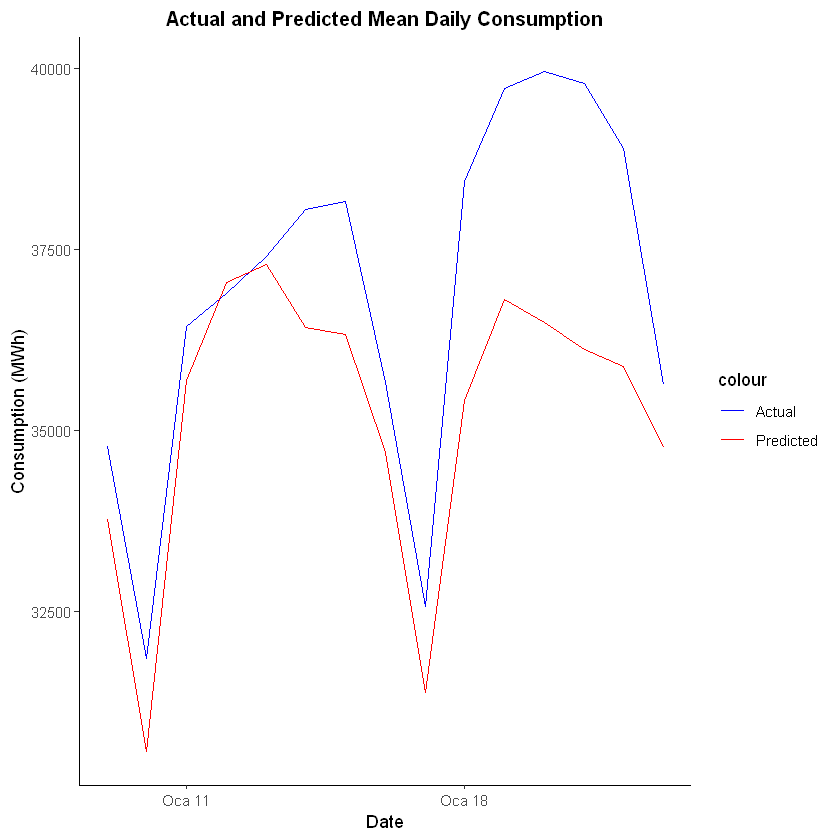

In [38]:
 p1 <- ggplot( data= Forecast_DT ) +
  theme_classic()+
  theme(plot.title = element_text(size = 12, face = "bold",hjust = 0.5))+
  labs( x="Date",y="Consumption (MWh)",title=("Actual and Predicted Mean Daily Consumption"))+
  geom_line( aes(x=Date, y=Consumption,colour="Actual"))+
    geom_line(aes(x=Date, y=Model2_Prediction ,colour="Predicted"))+
scale_color_manual(values = c("blue","red")) 

p1

In [32]:
Forecast_DT[,Abs_Error:= abs(Consumption - Model2_Prediction),]
Forecast_DT[,Perc_Error:= Abs_Error/Consumption*100,]
Forecast_DT

Date,Consumption,Model1_Prediction,Model2_Prediction,Abs_Error,Perc_Error
2021-01-09,34781.56,29620.26,33762.62,1018.9438,2.9295517
2021-01-10,31841.90,25946.93,30561.03,1280.8725,4.0226007
2021-01-11,36431.46,30702.49,35687.66,743.8004,2.0416429
2021-01-12,36897.99,31793.22,37050.66,152.6655,0.4137502
2021-01-13,37409.87,31841.51,37293.27,116.6023,0.3116887
2021-01-14,38056.05,30839.02,36427.82,1628.2353,4.2785187
2021-01-15,38170.38,30641.41,36326.31,1844.0688,4.8311509
2021-01-16,35667.35,28942.19,34694.32,973.0213,2.7280451
2021-01-17,32557.96,25576.67,31375.75,1182.2112,3.6310976
2021-01-18,38447.89,29582.70,35414.51,3033.3795,7.8895869


In [33]:
error_test <- function(actual, forecasted){
  n=length(actual)
  error = actual-forecasted
  mean=mean(actual)
  sd=sd(actual)
  bias = sum(error)/sum(actual)
  mape = sum(abs(error/actual))/n
  mad = sum(abs(error))/n
  wmape = mad/mean
  df = data.frame(n,mean,sd,bias,mape,mad,wmape)
  return(df)
}

In [34]:
error_test(Forecast_DT$Consumption,Forecast_DT$Model2_Prediction)

n,mean,sd,bias,mape,mad,wmape
15,36951.79,2500.597,0.0462321,0.0457048,1728.714,0.04678297
